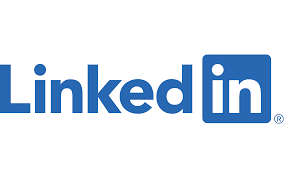

# <font color='3386FF'>Проект "Анализируем вакансии для аналитиков данных" </font> 

## <font color='3386FF'>Цель</font> 
Визуализировать информацию о рынке вакансий для Data Analyst и Data Scientist в Европе

## <font color='3386FF'>Задачи </font> 
1. Загрузить и ознакомиться с данными
2. Выполнить предобработку
3. Визуализировать обработанные данные

### Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import warnings
warnings.simplefilter('ignore')

import re

### Предзагрузим данные

In [2]:
df = pd.read_csv('linkedin.csv', index_col=False)
df.sample(5) #выведем на экран 5 различных строк с данными

,title,location,country,employment_type,company_name,employee_qty,company_field,skills,job_description,applicants
538,Data Analyst - Milano,Cusano Milanino,Italy,Hybrid,CPM Italy,51-200 employees,Retail,"<span class=""visually-hidden""><!-- -->Skills: ...",This job is...,NaN
291,Data Analyst (m/w/d),Germany,Germany,On-site,Charisma-Tec GmbH,1-10 employees,Human Resources Services,"<span class=""visually-hidden""><!-- -->Skills: ...",This job is...,21.0
886,(Junior) Project Coordinator,Rotterdam and The Hague,Rotterdam and The Hague,Hybrid,deugro,"1,001-5,000 employees","Transportation, Logistics, Supply Chain and St...","<span class=""visually-hidden""><!-- -->Skills: ...",The deugro group ...,103.0
761,Data Engineer (m/f/d),Greater Munich Metropolitan Area,Greater Munich Metropolitan Area,Hybrid,DocuWare,"501-1,000 employees",IT Services and IT Consulting,"<span class=""visually-hidden""><!-- -->Skills: ...",WHY SHOULD YOU J...,139.0
984,Analytics & Reporting - Associate – Warsaw,Warsaw,Poland,On-site,Goldman Sachs,"10,001+ employees",Financial Services,"<span class=""visually-hidden""><!-- -->Skills: ...",Job Description ...,NaN


Визуально мы можем определить следующие столбцы и их содержимое:

`title` - название вакансии;

`location` - город, где планируется работать согласно вакансии;

`country` - страна, где планируется работать согласно вакансии;

`employment_type`- тип занятости;

`company_name` - нзвание компании;

`employee_qty` - численность сотрудников в компании;

`company_field` - отрасль, в котрой работает компания;

`skills` - навыки вакансии;

`job_description` - описани вакансии;

`applicants` - количество откликнувшихся человек на вакансию.

Рассмотрим предоставленный датасет подробнее, передадим его функцие для анализа данных

In [3]:
def dataset_info(dataset):
    count = 0
    for column in dataset.columns:
        count += 1
        print('Название столбца:     ',column)                          #покажет как называется столбец
        print('Длина столбца:        ',len(dataset[column]))            #отобразит длину столбца
        print('Количество пропусков: ',dataset[column].isna().sum())    #отобразит количество пропусков
        print('Тип данных в столбце: ',dataset[column].dtype)           #покажет тип данных в столбце
        print('Пример значений:      ')                                 
        print(dataset[column].unique())                                 #отобразит уникальные значения
        print('Количество уникальных значений: ',dataset[column].nunique())  #отобразит количество уникальных значений
        print('----------------')
    print('Всего столбцов в датасете:', count)                          #подсчитает количество столбцов в датасете
    print('Количество дубликатов: ',dataset.duplicated().sum())         #подсчитает количество полных строк-дубликатов

In [4]:
#передадим для анализа наш датасет
dataset_info(df) 

Название столбца:      title
Длина столбца:         998
Количество пропусков:  0
Тип данных в столбце:  object
Пример значений:      
['Data Analyst' 'Data Analyst - Logistics'
 'Data Analyst (Space & Planning)' 'Data Analyst - Hybrid Working'
 'Commercial Data Analyst' 'Asset Data Analyst' 'Data Analyst - Hybrid'
 'Data Analyst (FT)' 'Data Analyst H/F' 'Data Analyst II'
 'Data Analyst (9 Months FTC)' 'Business Intelligence Analyst'
 'Data Analyst (F/H)' 'BI Analyst' 'Data Analyst Associate'
 'Product Data Analyst' 'Graduate Data Analyst' 'Digital Data Analyst'
 'Business Intelligence Analyst Junior' 'Data analyst H/F'
 'Data Analyst (m/f/d)' 'Analytics Consultant' 'Data Analyst F/H'
 'Consultor BI' 'Statistical Data Analyst' 'Digital Data Analyst (H/F)'
 'Data Analyst - €60,- per hour - Amsterdam based'
 'Data & Analytics Senior Analyst' 'JUNIOR DATA ANALYST – Aerospace'
 'Data Analyst - Operations' 'Data Analyst (H/F)'
 'BUSINESS INTELLIGENCE ANALYST' 'Business Intelligence Analyst (

['                            What You Will Achieve   This position will apply advanced manufacturing, science, and technology to support business and process improvements for the manufacture of small and / or large volume parenteral products. You will be a member of the Transformation and Strategy team. As a Data Analyst you will be responsible for mining, retrieving, organizing, and analyzing data to support the operations of a large manufacturing facility. Using the data, you will help to develop key performance indicators to demonstrate the effectiveness of processes and systems against business strategies.   Your knowledge of manufacturing operations and computer systems/tools will make you a critical member of the team. Your strong business processes and workflow skills will help facilitate required gatherings for building and enhancing business process maps and strategies. Your innovative use of communication tools and techniques will facilitate in explaining difficult issues, e

По результатам работы функции можно сделать следующие выводы по столбцам:

`title` - данные в столбце вводятся вручную, соответственно может быть ошибка ввода данных (некорректный регистр), приведем все названия вакансий к нижнему регистру, тем самым уменьшим количество дублей.

`location` - тут никаких ошибок не наблюдается, ведь список города и страны выбирается из готового списка на сайте;

`country` - хотя страна и выбирается из списка, видим добавление лишних пробелов после парсинга;

`employment_type`- никаких отклонений на найдено;

`company_name` - тут можно отметить две вакансии, в которых пропущено название компании;

`employee_qty` - численность сотрудников в компании;

`company_field` - видим ошибки парсинга, пришли значения с количество сотрудников;

`skills` - также наблюдаем ошибки парсинга, исправим это;

`job_description` - поправим количество пробелов;

`applicants` - тут видимых проблем не наблюдается.

Произведем преобработку данных с учетом высталенных требований

### &#128196; <font color='3342FF'>Столбец title </font>  

Для начала приведем все наименования вакансий к нижнему регистру, это позволит нам укрупнить количество уникальных наименований. Проверим это.

In [5]:
#проверим колчиество уникальных значений
print('Количество уникальных значений: ',df['title'].nunique()) 

Количество уникальных значений:  560


In [6]:
#посмотрим на топ-20 распространенных наименований вакансий
df['title'].value_counts().head(20) 

Data Analyst                                         93
Online Data Analyst                                  38
Data Analyst - Milano                                28
Data Analyst (m/w/d)                                 25
Datový analytik                                      19
Sozialwissenschaftler*in als Data Analyst (w/m/d)    19
Data Analyst:in                                      19
Reliability Data Analyst                             19
Data Scientist                                       17
Stage | Data Analyst                                 17
Data Engineer                                        16
Business Analyst                                     16
Product Data Analyst                                 10
Junior Business Analyst                               6
Junior Data Analyst                                   6
Data-analist                                          5
Business Intelligence Developer                       5
BI Specialist                                   

In [7]:
#приведем наименование к нижнему регистру
df['title'] = df['title'].astype('str').str.lower() 

In [8]:
#проверим колчиество уникальных значений после корректировки
print('Количество уникальных значений: ',df['title'].nunique()) 

Количество уникальных значений:  547


In [9]:
#посмотрим на топ-20 распространенных наименований вакансий после корректировки названий
df['title'].value_counts().head(20) 

data analyst                                         98
online data analyst                                  38
data analyst - milano                                28
data analyst (m/w/d)                                 26
datový analytik                                      19
reliability data analyst                             19
data analyst:in                                      19
sozialwissenschaftler*in als data analyst (w/m/d)    19
data scientist                                       18
business analyst                                     17
stage | data analyst                                 17
data engineer                                        16
product data analyst                                 10
junior business analyst                               6
junior data analyst                                   6
data analyst h/f                                      6
business intelligence analyst                         6
data analist                                    

Приведя названия вакансий к нижнему регистру, удалось не поменять сути наименований, но укрупнить их.

Согласно техническому заданию на анализ, требуется найти вакансии data analyst и data scientist, следовательно другие для нас не представляют особой ценности. Но мы видим, что некотрые вакансии размещены на локальных европейских языках (например *datový analytik*) или же синтаксически некорректные (например *data analist*). Поэтому удалим строки, которые не соответствуют искомым позициям, но будем делать это поэтапно:

1. Определим вакансии содержащие *dat* (сюда войдут и data analyst и data scientist, в том числе и на локальных языках).

2. Т.к. существуют data инженеры, архитекторы и прочие, также найдем вакансии, но уже содержащие *anal* и *scient*.

3. Приведем разноплановые написания названий к двум: к data analyst и data scientist.

* 1 этап.
Определим вакансии содержащие dat (сюда войдут и data analyst и data scientist, в том числе и на локальных языках). Затем подчистаем результаты фильтрации.

In [10]:
df_data = df[df['title'].str.contains("dat")]

#выведем новый датасет
df_data

,title,location,country,employment_type,company_name,employee_qty,company_field,skills,job_description,applicants
0,data analyst,Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,11-50 employees,Staffing and Recruiting,None,What You Will Achi...,47.0
1,data analyst - logistics,Coventry,United Kingdom,On-site,Resolute Recruitment,not specified,not specified,None,,NaN
2,data analyst - logistics,Coventry,United Kingdom,On-site,Resolute Recruitment,not specified,not specified,None,Data Analyst - Lo...,NaN
3,data analyst (space & planning),South Molton,United Kingdom,On-site,Mole Valley Farmers,not specified,not specified,None,Salary: To b...,NaN
4,data analyst,Lugano,Switzerland,On-site,FORFIRM,not specified,not specified,None,FORFIRM is p...,NaN
...,...,...,...,...,...,...,...,...,...,...
988,data analyst job in overseas,Naples,Italy,On-site,WALKWAY IMMIGRATION SERVICES LLP,See how you compare to 4 applicants. Try Premi...,See how you compare to 4 applicants. Try Premi...,None,This job is...,4.0
992,emerton data: data scientist & strategy consul...,Paris,France,Hybrid,Emerton,51-200 employees,Business Consulting and Services,"<span class=""visually-hidden""><!-- -->Skills: ...",Visit: emerton-d...,188.0
993,ingeniero de datos power bi + azure datafactory,Spain,Spain,Remote,Apiux Tecnología,201-500 employees,Information Technology & Services,"<span class=""visually-hidden""><!-- -->Skills: ...",¡Apiux está lider...,55.0
994,stage | data analyst,Vermezzo,Italy,Hybrid,CPM Italy,51-200 employees,Retail,"<span class=""visually-hidden""><!-- -->Skills: ...",This job is...,NaN


In [11]:
print('Количество строк до фильтрации dat',df.shape[0])
print('Количество строк после фильтрации',df_data.shape[0])
print('Количество удаленных строк',df.shape[0] - df_data.shape[0])
print('Потеря данных составила:',round(100 - df_data.shape[0]/df.shape[0]*100,2),'%')

Количество строк до фильтрации dat 998
Количество строк после фильтрации 684
Количество удаленных строк 314
Потеря данных составила: 31.46 %


In [12]:
#количество уникальных названий вакансий
print('Количество уникальных значений: ',df_data['title'].nunique()) 

Количество уникальных значений:  299


* 2 этап. Найдем вакансии, содержащие ключевые слова: *anal* и *scient*.

In [13]:
#оставим в новом датасете вакансии только для data scientist и data analyst
df_clear = df_data[df_data ['title'].str.contains("anal|scient")]

In [14]:
#выведем новый датасет
df_clear.sample(5) 

,title,location,country,employment_type,company_name,employee_qty,company_field,skills,job_description,applicants
976,data analyst / risques de crédit - boursorama-...,Boulogne-Billancourt,France,Hybrid,Boursorama,"501-1,000 employees",Financial Services,"<span class=""visually-hidden""><!-- -->Skills: ...",22000SJP Vos m...,53.0
167,product data analyst,Paris,France,On-site,Lydia,51-200 employees,IT Services and IT Consulting,"<span class=""visually-hidden""><!-- -->Skills: ...",With over 6 milli...,164.0
411,online data analyst,Gloucestershire,United Kingdom,Remote,TELUS International AI Data Solutions,"10,001+ employees",IT Services and IT Consulting,None,TELUS Internatio...,24.0
64,product data analyst,Taibon,Italy,On-site,"Stanley Black & Decker, Inc.","10,001+ employees",Manufacturing,"<span class=""visually-hidden""><!-- -->Skills: ...",Job Title: Pro...,12.0
184,data analyst (m/w/d),Cologne,Germany,Hybrid,Visser & Van Baars,51-200 employees,Staffing and Recruiting,"<span class=""visually-hidden""><!-- -->Skills: ...",Für einen Geschäf...,139.0


Проверим количество строк, которые были удалены после выделения искомых позиций.

In [15]:
print('Количество строк на 1 этапе фильтарции',df_data.shape[0])
print('Количество строк на 2 этапе фильтрации',df_clear.shape[0])
print('Количество удаленных строк',df_data.shape[0] - df_clear.shape[0])
print('Потеря данных составила:',round(100 - (df_clear.shape[0]/df_data.shape[0]*100),2),'%')

Количество строк на 1 этапе фильтарции 684
Количество строк на 2 этапе фильтрации 616
Количество удаленных строк 68
Потеря данных составила: 9.94 %


In [16]:
#количество уникальных названий вакансий
print('Количество уникальных значений: ',df_clear['title'].nunique()) 

Количество уникальных значений:  251


* 3 этап. Приведем разноплановые написания названий к двум: к data analyst и data scientist.

In [17]:
#определим функцию для упорядочивания наименования вакансии
def name_change(aim): 
        if 'anal' in aim:
            return 'data analyst'
        if 'scient' in aim:
            return 'data scientist'
        return aim

In [18]:
#применим нашу функцию
df_clear['title'] = df_clear['title'].apply(name_change) 

Теперь для контроля работы функции, проверим какое количество уникальных названий осталось после работы функции.

In [19]:
print('Количество уникальных значений: ',df_clear['title'].nunique()) 

Количество уникальных значений:  2


In [20]:
df_clear['title'].value_counts().head(20)

data analyst      578
data scientist     38
Name: title, dtype: int64

Функция сработала корректно, у нас теперь вакансии поделены лишь между двумя искомыми (согласно ТЗ) позициями.

### &#128205; <font color='3342FF'>Столбец location </font>  

Тут явных проблем не обнаружили, которые стоило бы исправлять. Но взглянем на топ-5 популярных городов.

In [21]:
#топ-5 городов по большему количеству вакансий
df_clear['location'].value_counts().head(5) 

Prague                     21
Cologne                    21
Frankfurt                  20
Gloucestershire            19
Rotterdam and The Hague    19
Name: location, dtype: int64

Больше всего вакансий размещено в Милане, Париже и Мадриде. Взглянем на самые редкие города.

In [22]:
#топ-5 городов по меньшему количеству вакансий
df_clear['location'].value_counts().tail(5) 

Doncaster                   1
County Dublin               1
Berlin Metropolitan Area    1
Villeneuve-d’Ascq           1
Valencia                    1
Name: location, dtype: int64

В этих городах размещено лишь по доной вакансии. Перейдем к анализу следующего столбца.

### &#128204;<font color='3342FF'>Столбец country</font>  

Из предудыщих шагов мы увидели, что в наименовании страны есть пробелы перед названием, взглянем еще раз. проверим гипотезу, что удалив пробелы, мы укрупним количество уникальных стран.

In [23]:
#вывдем топ-20 стран с вакансиями
df_clear['country'].value_counts().head(20) 

 Germany                             93
 United Kingdom                      89
 Italy                               77
 France                              74
 Netherlands                         41
 Spain                               27
 Poland                              24
 Belgium                             23
 Czechia                             22
Rotterdam and The Hague              19
 Sweden                              14
Germany                              11
 Greece                              10
 Ireland                              9
 Portugal                             9
 Hungary                              6
Poland                                5
 Austria                              4
 Switzerland                          4
Greater Paris Metropolitan Region     4
Name: country, dtype: int64

In [24]:
print('Количество уникальных стран: ',df_clear['country'].nunique())

Количество уникальных стран:  56


In [25]:
#удалим пробелы в записях
df_clear['country'] = df_clear['country'].str.strip() 

In [26]:
#выведем топ-25 стран с вакансиями после удаления пробелов
df_clear['country'].value_counts().head(25) 

Germany                              104
United Kingdom                        89
Italy                                 79
France                                75
Netherlands                           42
Poland                                29
Spain                                 27
Belgium                               23
Czechia                               22
Rotterdam and The Hague               19
Sweden                                14
Greece                                10
Portugal                               9
Ireland                                9
Hungary                                7
Austria                                4
Bulgaria                               4
Switzerland                            4
Greater Paris Metropolitan Region      4
Greater Milan Metropolitan Area        3
Luxembourg                             3
Lithuania                              3
Norway                                 2
Romania                                2
Wroclaw Metropol

In [27]:
#выведем обратный топ-25 стран с вакансиями после удаления пробелов
df_clear['country'].value_counts().tail(25) 

Romania                                        2
Wroclaw Metropolitan Area                      2
Slovakia                                       2
Brussels Metropolitan Area                     2
Greater Barcelona Metropolitan Area            2
Latvia                                         2
Finland                                        1
Stuttgart Region                               1
Croatia                                        1
Athens Metropolitan Area                       1
Monaco                                         1
Eindhoven Area                                 1
Greater Pau Area                               1
Malta                                          1
Denmark                                        1
Prague Metropolitan Area                       1
Berlin Metropolitan Area                       1
Greater Nuremberg Metropolitan Area            1
Greater Banska Bystrica Area                   1
Greater Munster Area                           1
Cologne Bonn Region 

In [28]:
print('Количество уникальных стран после удаления пробелов: ',df_clear['country'].nunique())

Количество уникальных стран после удаления пробелов:  48


Мы видим, что после парсинга мы видим на месте страны - район агломерации. Создадим функцию, которая заменит этот самый район на страну.

In [29]:
#определим функцию для упорядочивания наименования вакансии
def country_change(aim): 
        if 'Greater Paris Metropolitan Region' in aim:
            return 'France'
        if 'Greater Milan Metropolitan Area' in aim:
            return 'Italy'
        if 'Wroclaw Metropolitan Area' in aim:
            return 'Poland'
        if 'Brussels Metropolitan Area' in aim:
            return 'Belgium'
        if 'Greater Barcelona Metropolitan Area' in aim:
            return 'Spain'
        if 'Athens Metropolitan Area' in aim:
            return 'Greece'
        if 'Greater Pau Area' in aim:
            return 'France'
        if 'Stuttgart Region' in aim:
            return 'Germany'
        if 'Eindhoven Area' in aim:
            return 'Netherlands'
        if 'Prague Metropolitan Area' in aim:
            return 'Czechia'
        if 'Rotterdam and The Hague' in aim:
            return 'Netherlands'
        if 'Berlin Metropolitan Area' in aim:
            return 'Germany'
        if 'Greater Nuremberg Metropolitan Area' in aim:
            return 'Germany'
        if 'Krakow Metropolitan Area' in aim:
            return 'Poland'
        if 'Greater Banska Bystrica Area' in aim:
            return 'Slovakia'
        if 'Greater Munster Area' in aim:
            return 'Germany'
        if 'Cologne Bonn Region' in aim:
            return 'Germany'
        if 'Iasi Metropolitan Area' in aim:
            return 'Romania'
        if 'Greater Palma de Mallorca Metropolitan Area' in aim:
            return 'Spain'
        return aim

In [30]:
#применим нашу функцию
df_clear['country'] = df_clear['country'].apply(country_change) 

In [31]:
#выведем топ-25 стран с вакансиями после удаления пробелов
df_clear['country'].value_counts().head(25)

Germany           109
United Kingdom     89
Italy              82
France             80
Netherlands        62
Poland             32
Spain              30
Belgium            25
Czechia            23
Sweden             14
Greece             11
Portugal            9
Ireland             9
Hungary             7
Bulgaria            4
Austria             4
Switzerland         4
Luxembourg          3
Romania             3
Slovakia            3
Lithuania           3
Latvia              2
Norway              2
Estonia             1
Malta               1
Name: country, dtype: int64

In [32]:
print('Количество уникальных стран после удаления пробелов: ',df_clear['country'].nunique())

Количество уникальных стран после удаления пробелов:  29


Тем самым мы укрупнили количество записей стран с 52 до 29, это наглядно видно на Германии, где изначально было 89 записей по стране, после манипуляции стало 109. Тем самым разнообразие написания свели к однообразию.

### &#128220;<font color='3342FF'>Столбец employment_type</font>  

В данном столбце никаких проблем не обнаружили, тем не менее взглянем какую форму работы предлагают работодатели

In [33]:
df_clear['employment_type'].value_counts()

Hybrid           267
On-site          237
Remote            67
not specified     45
Name: employment_type, dtype: int64

Преобладает гидридный формат работы, дальше следует работа офисе и крайне мало предлагают удаленную работу, 40 работодателей не указали тип работы.

### &#128101;<font color='3342FF'>Столбец employee_qty</font>  


Также взглянем на распределение фирм, по числу сотрудников у них:

In [34]:
df_clear['employee_qty'].value_counts()

10,001+ employees                                                                                  171
51-200 employees                                                                                   113
1,001-5,000 employees                                                                               95
501-1,000 employees                                                                                 55
11-50 employees                                                                                     49
201-500 employees                                                                                   45
5,001-10,000 employees                                                                              37
1-10 employees                                                                                      27
not specified                                                                                       16
See how you compare to 9 applicants. Try Premium for free                

Преобладают крупные компании с числом сотрудников больше 10000. Однако можно увидеть ошибки парсинга. Попробуем их убрать, для этого список формулировок, которые ошибочно попали в датасет и заменим их на неопреденную группу

In [35]:
#составим список ошибочных данных
s = ['See how you compare to 9 applicants. Try Premium for free', 'Svein Grande is hiring for this job', 
'See how you compare to 19 applicants. Try Premium for free',
'See how you compare to 22 applicants. Try Premium for free', 
'See how you compare to 13 applicants. Try Premium for free',
'See recent hiring trends for Devonshire Hayes Recruitment Specialists Ltd. Try Premium for free', 
'See how you compare to 10 applicants. Try Premium for free','See how you compare to 4 applicants. Try Premium for free']

In [36]:
#проверим эти строки
df_clear[df_clear['employee_qty'].isin(s)] 

,title,location,country,employment_type,company_name,employee_qty,company_field,skills,job_description,applicants
285,data analyst,Cambridge,United Kingdom,On-site,i-Jobs,See how you compare to 9 applicants. Try Premi...,See how you compare to 9 applicants. Try Premi...,None,This job is...,9.0
286,data analyst,Drammen,Norway,On-site,Vegfinans,Svein Grande is hiring for this job,Svein Grande is hiring for this job,"<span class=""visually-hidden""><!-- -->Skills: ...",Data scientist/an...,28.0
433,data analyst,London,United Kingdom,not specified,i-Jobs,See how you compare to 19 applicants. Try Prem...,See how you compare to 19 applicants. Try Prem...,None,This job is...,19.0
458,data analyst,West Midlands,United Kingdom,Hybrid,Proprec,See how you compare to 22 applicants. Try Prem...,See how you compare to 22 applicants. Try Prem...,None,This job is...,22.0
682,data analyst,Chaucer,United Kingdom,not specified,Monarch IT,See how you compare to 13 applicants. Try Prem...,See how you compare to 13 applicants. Try Prem...,None,This job is...,13.0
774,data analyst,Bracknell,United Kingdom,Hybrid,Devonshire Hayes Recruitment Specialists Ltd,See recent hiring trends for Devonshire Hayes ...,See recent hiring trends for Devonshire Hayes ...,None,This job is...,2.0
777,data analyst,Manchester,United Kingdom,Hybrid,In Technology Group,See how you compare to 10 applicants. Try Prem...,See how you compare to 10 applicants. Try Prem...,None,This job is...,10.0
988,data analyst,Naples,Italy,On-site,WALKWAY IMMIGRATION SERVICES LLP,See how you compare to 4 applicants. Try Premi...,See how you compare to 4 applicants. Try Premi...,None,This job is...,4.0


Как видно, у этих строк не только проблема с текущим столбцом `company_field` и `job_description`. В дальнейших шагах проверим это и исправим.

In [37]:
#заменим некорректные значения в столбце employee_qty на 'not specified'
df_clear['employee_qty']=df_clear['employee_qty'].replace(s,'not specified') 

In [38]:
#проверим замену данных
df_clear['employee_qty'].value_counts() 

10,001+ employees         171
51-200 employees          113
1,001-5,000 employees      95
501-1,000 employees        55
11-50 employees            49
201-500 employees          45
5,001-10,000 employees     37
1-10 employees             27
not specified              24
Name: employee_qty, dtype: int64

Замена данных прошла успешно, перейдем к анализу следующего столбца.

### &#127970;<font color='3342FF'>Столбец company_name</font>  

В визаульном контроле проблем с этим столбцом не обнаружили, но также взглянем на топ-10 компаний, которые размещают большее количество вакансий для `data analyst` и `data scientist`.

In [39]:
df_clear['company_name'].value_counts().head(10)

CPM Italy                                45
TELUS International AI Data Solutions    23
TELUS International                      20
ZF Group                                 19
Deutsche Bahn                            19
Pinnacle                                 19
MSR Consulting Group GmbH                19
Revolut                                  12
Charisma-Tec GmbH                        10
Credit Agricole Consumer Finance          4
Name: company_name, dtype: int64

**CPM Italy** - разместило наиболее количество вакансий для `data analyst` и `data scientist`. Также можно заметить **TELUS International AI Data Solutions** и **TELUS International** - разметили похожее количество вакансий, хотя название у них похожее, объединять мы эти компании не будет. Вполне вероятно, что одна из них является дочерней по отношению к другой.

### &#127981;<font color='3342FF'>Столбец company_field</font>  

Визуальный контроль выявил проблемы в этом столбце, так в процессе парсинга появлиась ошибка заполнения поля значениями из другого. Также сделаем список таких значений и заменим их.

In [40]:
#запросим длину списка с уникальными значениями
len(df_clear['company_field'].value_counts()) 

92

In [41]:
#взглянем на начало списка уникальных значений
df_clear['company_field'].value_counts().head(40) #

IT Services and IT Consulting                            98
Retail                                                   59
Staffing and Recruiting                                  48
Financial Services                                       38
Business Consulting and Services                         34
Technology, Information and Internet                     27
Motor Vehicle Manufacturing                              26
Transportation, Logistics, Supply Chain and Storage      24
Industrial Machinery Manufacturing                       20
Banking                                                  19
Human Resources Services                                 18
not specified                                            16
Advertising Services                                     12
Information Technology & Services                        11
Software Development                                     10
Entertainment Providers                                   7
Retail Apparel and Fashion              

In [42]:
#взглянем на конец списка уникальных значений
df_clear['company_field'].value_counts().tail(41) 

Dairy Product Manufacturing                                                                        1
International Affairs                                                                              1
Hospitality                                                                                        1
Wholesale Building Materials                                                                       1
See recent hiring trends for Devonshire Hayes Recruitment Specialists Ltd. Try Premium for free    1
Research                                                                                           1
Musicians                                                                                          1
See how you compare to 13 applicants. Try Premium for free                                         1
Food & Beverages                                                                                   1
See how you compare to 10 applicants. Try Premium for free                                 

In [43]:
#состиавим список на замену значений
a = ['11-50 employees', '1-10 employees','51-200 employees','See how you compare to 22 applicants. Try Premium for free',
    'See how you compare to 19 applicants. Try Premium for free', 'See how you compare to 13 applicants. Try Premium for free',
     'See recent hiring trends for Devonshire Hayes Recruitment Specialists Ltd. Try Premium for free',
     'See how you compare to 10 applicants. Try Premium for free', '201-500 employees',
     'See how you compare to 9 applicants. Try Premium for free', 'See how you compare to 4 applicants. Try Premium for free']

In [44]:
#проведем замену значений
df_clear['company_field']=df_clear['company_field'].replace(a,'not specified') 

In [45]:
#проверим замену значений
df_clear['company_field'].value_counts()

IT Services and IT Consulting                   98
Retail                                          59
Staffing and Recruiting                         48
Financial Services                              38
not specified                                   37
                                                ..
Consumer Services                                1
Public Relations and Communications Services     1
Armed Forces                                     1
Svein Grande is hiring for this job              1
Research Services                                1
Name: company_field, Length: 81, dtype: int64

После замены значений, поле 'not specified' увеличилось в два раза. Перейдем к следующему столбцу

### &#127992;<font color='3342FF'>Столбец skills</font>  

В предыдущем шаге, мы увидели, что эти скиллы при парсинге были распознаны плохо. Также можно отметить, что они являются неполными (два признака видны, остальные скрыты) и частично переведнными на язык интерфейса пользователя (в нашем случае - русский язык). Т.к. они неполные - их нельзя использовать корректно для оценки требований к вакансии.

In [46]:
#посмотрим количество уникальных значений
df_clear['skills'].value_counts().head(10)

None                                                                                                                            105
<span class="visually-hidden"><!-- -->Skills: Data Analytics, Визуализация данных, +8 more<!-- --></span>                        39
<span class="visually-hidden"><!-- -->Skills: Аналитические навыки, Ключевые показатели деятельности, +8 more<!-- --></span>     28
<span class="visually-hidden"><!-- -->Skills: Коммуникация, Транспортировка по трубопроводу, +8 more<!-- --></span>              19
<span class="visually-hidden"><!-- -->Skills: SPSS, VBA, +8 more<!-- --></span>                                                  19
<span class="visually-hidden"><!-- -->Skills: Аналитические навыки, Microsoft Office, +8 more<!-- --></span>                     19
<span class="visually-hidden"><!-- -->Skills: Английский язык, Социальные медиа, +8 more<!-- --></span>                          14
<span class="visually-hidden"><!-- -->Skills: Панель управления, SQL, +8 mor

Также можно отметить в 103 записей вообще не указаны навыки, поэтому удалим это столбец.

In [47]:
#удалим столбец
df_clear = df_clear.drop('skills', axis=1)

In [48]:
#проверм удаление столбца
df_clear.head(5)

,title,location,country,employment_type,company_name,employee_qty,company_field,job_description,applicants
0,data analyst,Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,11-50 employees,Staffing and Recruiting,What You Will Achi...,47.0
1,data analyst,Coventry,United Kingdom,On-site,Resolute Recruitment,not specified,not specified,,NaN
2,data analyst,Coventry,United Kingdom,On-site,Resolute Recruitment,not specified,not specified,Data Analyst - Lo...,NaN
3,data analyst,South Molton,United Kingdom,On-site,Mole Valley Farmers,not specified,not specified,Salary: To b...,NaN
4,data analyst,Lugano,Switzerland,On-site,FORFIRM,not specified,not specified,FORFIRM is p...,NaN


После небольшой предобработки, проверим количество дублирующих строк (соответственно и вакансий)

In [49]:
#проверим количество дублирующих вакансий
q = df_clear.shape[0]
df_clear[df_clear.duplicated()]

,title,location,country,employment_type,company_name,employee_qty,company_field,job_description,applicants
292,data analyst,Germany,Germany,On-site,Charisma-Tec GmbH,1-10 employees,Human Resources Services,This job is...,21.0
293,data analyst,Germany,Germany,On-site,Charisma-Tec GmbH,1-10 employees,Human Resources Services,This job is...,21.0
294,data analyst,Germany,Germany,On-site,Charisma-Tec GmbH,1-10 employees,Human Resources Services,This job is...,21.0
295,data analyst,Germany,Germany,On-site,Charisma-Tec GmbH,1-10 employees,Human Resources Services,This job is...,21.0
296,data analyst,Germany,Germany,On-site,Charisma-Tec GmbH,1-10 employees,Human Resources Services,This job is...,21.0
...,...,...,...,...,...,...,...,...,...
776,data analyst,Debrecen,Hungary,not specified,NI (National Instruments),"5,001-10,000 employees","Appliances, Electrical, and Electronics Manufa...",Job Description ...,14.0
782,data analyst,Neuilly-sur-Seine,France,On-site,Initiative,"5,001-10,000 employees",Advertising Services,Mediabrands est...,136.0
823,data analyst,Kosice,Slovakia,Hybrid,Erste Digital,"1,001-5,000 employees",IT Services and IT Consulting,With top notch te...,11.0
825,data analyst,Croix,France,On-site,illicado,51-200 employees,Financial Services,"illicado, N°1 fra...",109.0


In [50]:
#удалим дубликаты
df_clear = df_clear.drop_duplicates()

In [51]:
#проверим результаты удаления
print('Количество строк в первичных данных',q)
print('Количество строк в очищенных данных',df_clear.shape[0])
print('Количество удаленных строк',q - df_clear.shape[0])
print('Потеря данных составила:',round(df_clear.shape[0]/q*100,2),'%')

Количество строк в первичных данных 616
Количество строк в очищенных данных 512
Количество удаленных строк 104
Потеря данных составила: 83.12 %


### &#128210;<font color='3342FF'>Столбец job_description</font>  

Создадим новые навыки для каждой вакансии из ее описания. Для этого создадим список со скиллами, где определим ключевые навыки для `data analyst` и `data scientist`:

In [52]:
#список с навыками
skills = [
    'a/b testing', 'ab testing', 'actian', 'adobe analytics', 'adobe audience manager',
    'adobe experience platform', 'adobe launch', 'adobe target', 'ai', 'airflow',
    'alooma', 'alteryx', 'amazon machine learning', 'amazon web services', 'aml',
    'amplitude', 'ansible', 'apache camel', 'apache nifi', 'apache spark',
    'api', 'asana', 'auth0', 'aws', 'aws glue', 'azure', 'azure data factory',
    'basecamp', 'bash', 'beats', 'big query', 'bigquery', 'birst', 'bitbucket',
    'blendo', 'bootstrap', 'business objects bi', 'c#', 'c++', 'caffe', 'cassandra',
    'cdata sync', 'chronograf', 'ci/cd', 'cicd', 'clickhouse', 'cloudera', 'cluvio',
    'cntk', 'cognos', 'composer', 'computer vision', 'conda', 'confluence',
    'couchbase', 'css', 'd3.js', 'dash', 'dashboard', 'data factory', 'data fusion',
    'data mining', 'data studio', 'data warehouse', 'databricks', 'dataddo',
    'dataflow', 'datahub', 'dataiku', 'datastage', 'dbconvert', 'dbeaver', 'dbt',
    'deep learning', 'dl/ml', 'docker', 'domo', 'dune', 'dv360', 'dynamodb',
    'elasticsearch', 'elt', 'erwin', 'etl', 'etleap', 'excel', 'facebook business manager',
    'fivetran', 'fuzzy', 'ga360', 'gcp', 'gensim', 'ggplot', 'git', 'github', 'gitlab',
    'google ads', 'google analytics', 'google cloud platform', 'google data flow',
    'google optimize', 'google sheets', 'google tag manager', 'google workspace',
    'grafana', 'hadoop', 'hana', 'hanagrafana', 'hbase', 'hdfs', 'hevo data', 'hightouch',
    'hive', 'hivedatabricks', 'html', 'hubspot', 'ibm coremetrics', 'inetsoft',
    'influxdb', 'informatica', 'integrate.io', 'iri voracity', 'izenda', 'java',
    'java script', 'javascript', 'jenkins', 'jira', 'jmp', 'julia', 'jupyter',
    'k2view', 'kafka', 'kantar', 'kapacitor', 'keras', 'kibana', 'kubernetes',
    'lambda', 'linux', 'logstash', 'looker', 'lstm', 'luidgi', 'matillion', 'matlab',
    'matplotlib', 'mendix', 'metabase', 'microsoft sql', 'microsoft sql server',
    'microstrategy', 'miro', 'mixpanel', 'ml', 'ml flow', 'mlflow', 'mongodb', 'mxnet',
    'mysql', 'natural nanguage processing', 'neo4j', 'nlp', 'nltk', 'nosql', 'numpy',
    'oauth', 'octave', 'omniture', 'omnituregitlab', 'openshift', 'openstack',
    'optimizely', 'oracle', 'oracle business intelligence', 'oracle data integrator',
    'pandas', 'panorama', 'pentaho', 'plotly', 'postgre', 'postgresql', 'posthog',
    'power amc', 'power bi', 'power point', 'powerbi', 'powerpivot', 'powerpoint',
    'powerquery', 'pyspark', 'python', 'pytorch', 'pytorchhevo data', 'qlik',
    'qlik sense', 'qlikview', 'querysurge', 'r', 'raphtory', 'rapidminer', 'redash',
    'redis', 'redshift', 'retool', 'rivery', 'rust', 's3', 'sa360', 'salesforce', 'sap',
    'sap business objects', 'sas', 'sas visual analytics', 'scala', 'scikit-learn',
    'scipy', 'seaborn', 'segment', 'selenium', 'sem rush', 'semrush', 'shell', 'shiny',
    'singer', 'sisense', 'skyvia', 'snowflake', 'spacy', 'spark', 'sparkml', 'splunk',
    'spotfire', 'spreadsheet', 'spss', 'sql', 'ssis', 'sssr', 'stambia', 'statistics',
    'statsbot', 'stitch', 'streamlit', 'streamsets', 'svn', 't-sql', 'tableau', 'talend',
    'targit', 'tealium', 'telegraf', 'tensorflow', 'terraapi', 'terraform', 'theano',
    'thoughtspot', 'timeseries', 'trello', 'unix', 'vba', 'vtom', 'webfocus', 'wfh',
    'xplenty', 'xtract.io', 'yellowfin'
]

Теперь же создадим функцию, которая будет искать навыки из списка в описании к вакансии, и "вычленит" их в отдельный список

In [53]:
#функция, которая находит навыки в описании к вакансии
def skills_finder(cell, skill_list_2=skills):
    matched_skills_list=[]
    for i in skill_list_2:
        if i == 'c++':
            if re.search('\Wc\+\+\W', cell.lower()):
                matched_skills_list.append(i)      
        # word_border + rewritten "i" in special symbols + word_border
        else:
            pattern = (
            r'(\b|\W)'
            + re.escape(i)
            + r'(\b|\W)'
            +'|'
            + r'(\b|\W)'
            +re.escape(i.replace(' ', ''))
            + r'(\b|\W)')
        if re.search(pattern, cell.lower()):
            matched_skills_list.append(i)
    return matched_skills_list

Теперь, определив функцию, применим ее на нашем столбце с описанием, а результат "сложим" в отдельный `skills_clear` столбец:

In [54]:
#применим нашу функцию с поиском скиллов на весь столбец, а результат появится в новом столбце
df_clear['skills_clear'] = df_clear['job_description'].apply(lambda x: skills_finder(x))

In [55]:
#проверим результат
df_clear.sample(5)

,title,location,country,employment_type,company_name,employee_qty,company_field,job_description,applicants,skills_clear
11,data analyst,Schiphol,Netherlands,On-site,Royal Schiphol Group,"1,001-5,000 employees",Airlines and Aviation,De functie Welk...,13.0,"[power bi, scala, sql]"
784,data analyst,Stockholm,Sweden,Hybrid,Storytel,"501-1,000 employees",Entertainment Providers,At Storytel we bel...,NaN,"[a/b testing, big query, bigquery, gcp, google..."
757,data analyst,Eindhoven Area,Netherlands,Remote,TELUS International,"10,001+ employees",IT Services and IT Consulting,We are hiring fre...,22.0,[ai]
116,data analyst,Coimbra,Portugal,Hybrid,Airbus,"10,001+ employees",Aviation and Aerospace Component Manufacturing,Job Description ...,25.0,"[pyspark, python]"
188,data analyst,Rijswijk,Netherlands,Hybrid,CBR,"1,001-5,000 employees",Government Administration,CBR in Rijswijk ...,30.0,"[excel, sql]"


In [56]:
df_clear.shape

(512, 10)

Так как в дальнейшем нам для построения дашборда необходимо чтобы навыки были распределены в единственном виде, раскроем наш список с навыками по одному для каждой вакансии (в датасете появятся дубли одной и той же вакансии, но с единиственным скиллом)

In [57]:
#"раскидаем" наши навыки
df_final= df_clear.explode('skills_clear')

In [58]:
#проверим работу
df_final.head(10)

,title,location,country,employment_type,company_name,employee_qty,company_field,job_description,applicants,skills_clear
0,data analyst,Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,11-50 employees,Staffing and Recruiting,What You Will Achi...,47.0,data mining
0,data analyst,Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,11-50 employees,Staffing and Recruiting,What You Will Achi...,47.0,excel
0,data analyst,Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,11-50 employees,Staffing and Recruiting,What You Will Achi...,47.0,sap
0,data analyst,Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,11-50 employees,Staffing and Recruiting,What You Will Achi...,47.0,sas
0,data analyst,Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,11-50 employees,Staffing and Recruiting,What You Will Achi...,47.0,spss
0,data analyst,Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,11-50 employees,Staffing and Recruiting,What You Will Achi...,47.0,sql
0,data analyst,Basel,Switzerland,On-site,PharmiWeb.Jobs: Global Life Science Jobs,11-50 employees,Staffing and Recruiting,What You Will Achi...,47.0,statistics
1,data analyst,Coventry,United Kingdom,On-site,Resolute Recruitment,not specified,not specified,,NaN,NaN
2,data analyst,Coventry,United Kingdom,On-site,Resolute Recruitment,not specified,not specified,Data Analyst - Lo...,NaN,wfh
3,data analyst,South Molton,United Kingdom,On-site,Mole Valley Farmers,not specified,not specified,Salary: To b...,NaN,excel


In [59]:
df_final.shape

(2505, 10)

**Мария: успешно применен метод .explode, отличная работа!**

### &#128100;<font color='3342FF'>Столбец applicants</font>  

Проверим количество пустых записей о количестве претендентов на вакансию. Ведь может быть, что никто не откликнулся на нее.

In [60]:
print('Количество пустых записей',df_clear['applicants'].isnull().sum())

Количество пустых записей 114


In [61]:
print('Что составляет ',round(df_clear['applicants'].isnull().sum()/len(df_clear['applicants'])*100,2),'%')

Что составляет  22.27 %


In [62]:
df_final.sample(5)

,title,location,country,employment_type,company_name,employee_qty,company_field,job_description,applicants,skills_clear
774,data analyst,Bracknell,United Kingdom,Hybrid,Devonshire Hayes Recruitment Specialists Ltd,not specified,not specified,This job is...,2.0,sql
450,data analyst,Leipzig,Germany,not specified,Agoda,"5,001-10,000 employees","Technology, Information and Internet",About Agoda Ag...,1.0,statistics
587,data scientist,Amsterdam,Netherlands,Hybrid,Decathlon Nederland,"1,001-5,000 employees",Retail,Data Scientist ...,NaN,etl
114,data analyst,Paris,France,Hybrid,Alteca,"501-1,000 employees",IT Services and IT Consulting,TRAVAILLER CHEZ ...,NaN,kafka
171,data analyst,The Randstad,Netherlands,Hybrid,BrightStone Group,51-200 employees,Business Consulting and Services,Note: This posit...,67.0,r


In [63]:
#заполним пустые значения
df_clear['applicants'] = df_clear['applicants'].fillna(0)

In [64]:
#общее количество откликов
sum(df_clear['applicants'])

25005.0

Заполнили пропуски нулевыми значениями, подчистали общее количество откликов

## <font color='3386FF'>Вывод</font> 

Удалось подготвить данные для дальнейшего построения дашборда, а именно:

`title` - привели наименование вакансии с единообразному ввиду (lower_case). В три этапа провели очистку названий вакансий, уделили вниманию написанию на локалных европейских языках и оставили лишь дата аналитиков и дата сайентистов;

`location` - тут никакой преобработки не понадобилось;

`country` - убрали лишние пробелы, которые образовались после парсинга;

`employment_type`- никаких манипуляций не производили;

`company_name` - данные оставили в первоначальном виде;

`employee_qty` - подправили ошибки парсинга, тем самым укрупнили группы;

`company_field` - также подправили ошибки парсинга и крупнили группы;

`skills` - этот столбец удалили, т.к. он содержал неполные данные, кторые необходимые для вакансии (всего лишь 2);

`job_description` - из этого столбца сформировали новый столбей с навыками, требуемыми для кандидата;

`applicants` - данные в этот столбце оставили без изменений, лишь заполнили пустые значения.

In [65]:
df_clear.to_csv(r'C:\Users\User\Documents\export_link_not_explode.csv', index=False, header=True)

In [66]:
df_final.to_csv(r'C:\Users\User\Documents\export_link.csv', index=False, header=True)